In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Setting up 

In [2]:
royal_blue = '#00538C'
navy_blue = '#002B5E'
silver = '#B8C4CA'
black = '#000000'
white = '#FFFFFF'

## Scoring distribution based on type of play

### Final results

In [3]:
plt.style.use('seaborn')

In [4]:
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats

In [5]:
def get_data_tracking_touches():
    # get data frame
    touches_types = LeagueDashPtStats(pt_measure_type='Efficiency', player_or_team='Player')
    touches_df = touches_types.get_data_frames()[0]
    
    # get doncic data only and add column
    doncic_df = touches_df.loc[touches_df.PLAYER_NAME=='Luka Doncic']
    doncic_df.loc[:, 'UNCLASSIFIED_PTS'] = doncic_df.POINTS - doncic_df.DRIVE_PTS - doncic_df.CATCH_SHOOT_PTS - \
        doncic_df.PULL_UP_PTS - doncic_df.PAINT_TOUCH_PTS - doncic_df.POST_TOUCH_PTS - doncic_df.ELBOW_TOUCH_PTS
    
    # pick interesting columns
    interesting_attrs = [
        doncic_df.DRIVE_PTS,
        doncic_df.CATCH_SHOOT_PTS,
        doncic_df.PULL_UP_PTS,
        doncic_df.PAINT_TOUCH_PTS,
        doncic_df.POST_TOUCH_PTS,
        doncic_df.ELBOW_TOUCH_PTS,
        doncic_df.UNCLASSIFIED_PTS
    ]
    
    return interesting_attrs

In [6]:
def plot_tracking_touches(data, ax):
    x_labels = [item.name.replace('_', ' ') for item in interesting_attrs]

    ax.bar(
        x=x_labels,
        height=[item.iloc[0] for item in interesting_attrs],
        color=royal_blue
    )

    for i in range(len(interesting_attrs)):
        points = interesting_attrs[i].iloc[0]
        ax.text(x=i, y=points-10, s=points, ha='center', color=silver, size=18)

    ax.set_title("Luka Dončić scoring distribution", size=24)

    ax.grid(False)
    ax.yaxis.set_visible(False)


    ax.set_facecolor(silver)

    fig.set_facecolor(silver)
    y_labels = ax.get_yticklabels()

    ax.set_xticklabels(x_labels, rotation=45, ha='right', size=14)
    
    return ax

### Prototyping

In [7]:
touches_types = LeagueDashPtStats(pt_measure_type='Efficiency', player_or_team='Player')

In [8]:
touches_df = touches_types.get_data_frames()[0]

In [9]:
doncic_df = touches_df.loc[touches_df.PLAYER_NAME=='Luka Doncic']

In [10]:
doncic_df.loc[:, 'UNCLASSIFIED_PTS'] = doncic_df.POINTS - doncic_df.DRIVE_PTS - doncic_df.CATCH_SHOOT_PTS - \
    doncic_df.PULL_UP_PTS - doncic_df.PAINT_TOUCH_PTS - doncic_df.POST_TOUCH_PTS - doncic_df.ELBOW_TOUCH_PTS

/home/daniel/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/daniel/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
interesting_attrs = [
    doncic_df.DRIVE_PTS,
    # doncic_df.DRIVE_FG_PCT,
    doncic_df.CATCH_SHOOT_PTS,
    doncic_df.PULL_UP_PTS,
    doncic_df.PAINT_TOUCH_PTS,
    doncic_df.POST_TOUCH_PTS,
    doncic_df.ELBOW_TOUCH_PTS,
    doncic_df.UNCLASSIFIED_PTS
]

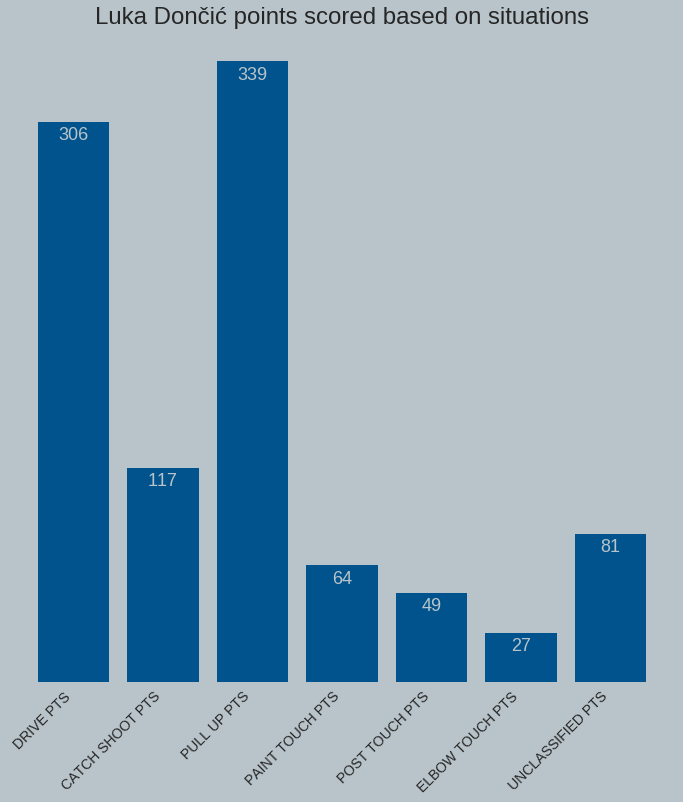

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))


x_labels = [item.name.replace('_', ' ') for item in interesting_attrs]

ax.bar(
    x=x_labels,
    height=[item.iloc[0] for item in interesting_attrs],
    color=royal_blue
)

for i in range(len(interesting_attrs)):
    points = interesting_attrs[i].iloc[0]
    ax.text(x=i, y=points-10, s=points, ha='center', color=silver, size=18)

ax.set_title("Luka Dončić points scored based on situations", size=24)

ax.grid(False)
ax.yaxis.set_visible(False)


ax.set_facecolor(silver)

fig.set_facecolor(silver)
y_labels = ax.get_yticklabels()

_ = ax.set_xticklabels(x_labels, rotation=45, ha='right', size=14)

fig.savefig('images/points_per_situation_chart.jpg', facecolor=silver, bbox_inches='tight')

## Clutch Time is Luka Time

In [13]:
from nba_api.stats.endpoints.leaguedashplayerclutch import LeagueDashPlayerClutch
from adjustText import adjust_text

In [14]:
plt.style.use('seaborn-white')

### Methods for data retrieval/plotting

In [15]:
def get_data_frame_clutch(season: str = "2018-19", rookies_only: bool = False, pre_all_star: bool = False):
    clutch_stats = LeagueDashPlayerClutch(season=season,
                                          player_experience_nullable="Rookie" if rookies_only else "",
                                          season_segment_nullable="Pre All-Star" if pre_all_star else "",
                                          )
    clutch_df = clutch_stats.get_data_frames()[0]
    sorted_clutch = clutch_df.sort_values(by='PTS', ascending=False)
    sorted_clutch.loc[:, 'TS_PCT'] = sorted_clutch.PTS / (2 * (sorted_clutch.FGA + 0.44 * sorted_clutch.FTA)) * 100
    
    return sorted_clutch

In [16]:
def plot_scatter_clutch(data, title, per_game_and_filter=False, image_name=None):
    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.set_facecolor(silver)

    doncic_row = data.loc[data.PLAYER_NAME == "Luka Doncic"]

    ax.scatter(
        x=data.PTS / data.GP if per_game_and_filter else data.PTS,
        y=data.TS_PCT,
        c=white
    )
    ax.scatter(
        x=doncic_row.PTS / doncic_row.GP if per_game_and_filter else doncic_row.PTS,
        y=doncic_row.TS_PCT,
        c=navy_blue
    )
    ax.text(
        x=doncic_row.PTS.iloc[0] / doncic_row.GP.iloc[0] + 0.05 if per_game_and_filter \
        else doncic_row.PTS.iloc[0] + 1,
        y=doncic_row.TS_PCT.iloc[0] + 0.5,
        s=doncic_row.PLAYER_NAME.iloc[0],
        size=12
    )

    ax.set_facecolor(silver)
    ax.grid(False, which='both')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel('True Shooting Percentage', size=12)
    ax.set_xlabel('Points per Game' if per_game_and_filter else 'Points' , size=12)
    _ = ax.set_title(title, size=16)
    
    if image_name:
        fig.savefig(image_name, bbox_inches='tight')

### Prototyping

In [17]:
clutch_stats = LeagueDashPlayerClutch()

In [18]:
clutch_df = clutch_stats.get_data_frames()[0]

In [19]:
sorted_clutch = clutch_df.sort_values(by='PTS', ascending=False)

In [20]:
sorted_clutch.loc[:, 'TS_PCT'] = sorted_clutch.PTS / (2 * (sorted_clutch.FGA + 0.44 * sorted_clutch.FTA)) * 100

In [21]:
top_scorers = sorted_clutch.iloc[:60, :]

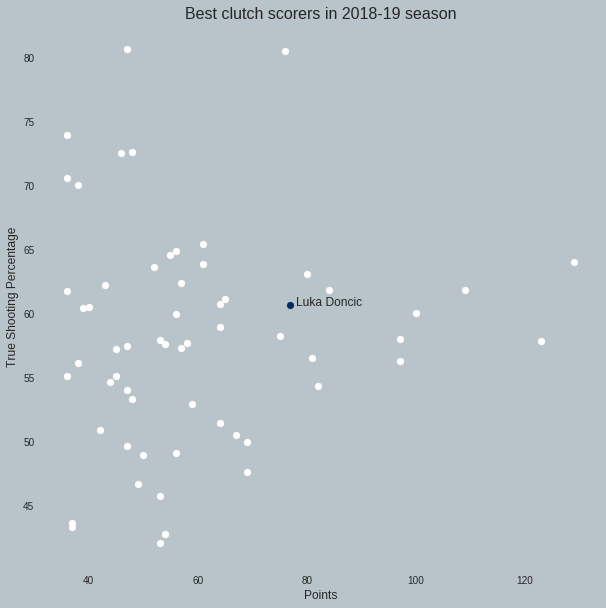

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor(silver)

doncic_row = top_scorers.loc[top_scorers.PLAYER_NAME == "Luka Doncic"]

ax.scatter(x=top_scorers.PTS, y=top_scorers.TS_PCT, c=white)
ax.scatter(x=doncic_row.PTS, y=doncic_row.TS_PCT, c=navy_blue)
ax.text(x=doncic_row.PTS.iloc[0]+1, y=doncic_row.TS_PCT.iloc[0], s=doncic_row.PLAYER_NAME.iloc[0], size=12)

ax.set_facecolor(silver)
ax.grid(False, which='both')
for spine in ['top', 'bottom', 'right', 'left']:
    ax.spines[spine].set_visible(False)

ax.set_ylabel('True Shooting Percentage', size=12)
ax.set_xlabel('Points', size=12)
_ = ax.set_title('Best clutch scorers in 2018-19 season', size=16)

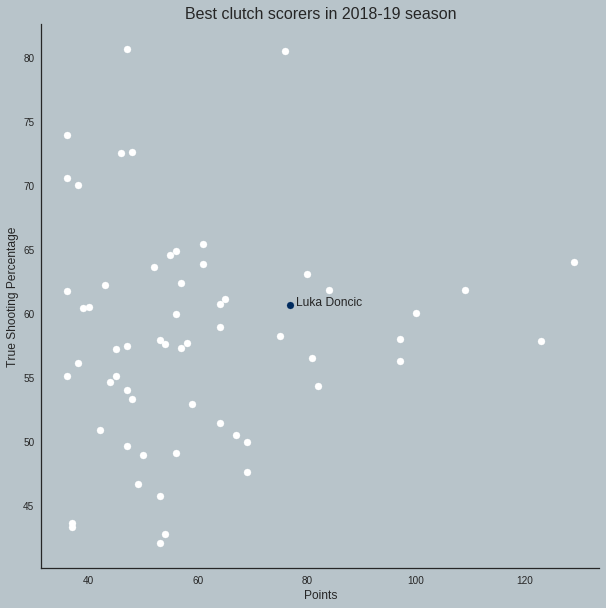

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor(silver)

doncic_row = top_scorers.loc[top_scorers.PLAYER_NAME == "Luka Doncic"]

ax.scatter(x=top_scorers.PTS, y=top_scorers.TS_PCT, c=white)
ax.scatter(x=doncic_row.PTS, y=doncic_row.TS_PCT, c=navy_blue)
ax.text(x=doncic_row.PTS.iloc[0]+1, y=doncic_row.TS_PCT.iloc[0], s=doncic_row.PLAYER_NAME.iloc[0], size=12)

ax.set_facecolor(silver)
ax.grid(False, which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('True Shooting Percentage', size=12)
ax.set_xlabel('Points', size=12)
_ = ax.set_title('Best clutch scorers in 2018-19 season', size=16)
fig.savefig('images/best_clutch_2018_19.jpg', facecolor=silver, bbox_inches='tight')

### Comparison with rookies from past sixteen years

In [24]:
seasons_ints = range(2003, 2019)
seasons = [str(season) + "-" + str(season+1)[-2:] for season in seasons_ints]

In [25]:
data_frame = None
for season in seasons:
    rookies_df = get_data_frame_clutch(season=season, rookies_only=True, pre_all_star=True)
    time.sleep(1)
    if data_frame is not None:
        data_frame = data_frame.append(rookies_df, ignore_index=True)
    else:
        data_frame = rookies_df

In [26]:
data_frame = data_frame.sort_values(by='PTS', ascending=False)

In [27]:
data_frame.head(10)

,GROUP_SET,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,TS_PCT
266,Players,201943,Brandon Jennings,1610612749,MIL,20.0,28,12,16,0.429,...,37,1,1,1,1,7,1,1,"201943,1610612749",61.197286
188,Players,201142,Kevin Durant,1610612760,SEA,19.0,24,8,16,0.333,...,30,1,1,32,1,9,1,1,"201142,1610612760",67.212608
267,Players,201936,Tyreke Evans,1610612758,SAC,20.0,27,11,16,0.407,...,40,2,2,39,2,1,1,1,"201936,1610612758",50.794021
223,Players,201565,Derrick Rose,1610612741,CHI,20.0,29,12,17,0.414,...,26,2,1,24,1,6,1,1,"201565,1610612741",47.136038
673,Players,1629029,Luka Doncic,1610612742,DAL,19.0,25,12,13,0.480,...,40,1,1,28,1,3,1,1,"1629029,1610612742",60.572687
389,Players,203081,Damian Lillard,1610612757,POR,22.0,32,19,13,0.594,...,50,1,1,1,1,2,1,1,"203081,1610612757",54.542738
616,Players,1628374,Lauri Markkanen,1610612741,CHI,21.0,27,12,15,0.444,...,54,2,1,45,2,2,3,1,"1628374,1610612741",50.988875
617,Players,1628378,Donovan Mitchell,1610612762,UTA,21.0,20,11,9,0.550,...,55,2,2,18,4,16,3,1,"1628378,1610612762",52.385558
224,Players,201566,Russell Westbrook,1610612760,OKC,20.0,28,9,19,0.321,...,39,1,2,22,2,11,1,1,"201566,1610612760",57.208238
86,Players,101108,Chris Paul,1610612740,NOK,21.0,23,14,9,0.609,...,44,1,1,11,1,1,1,1,"101108,1610612740",70.955535


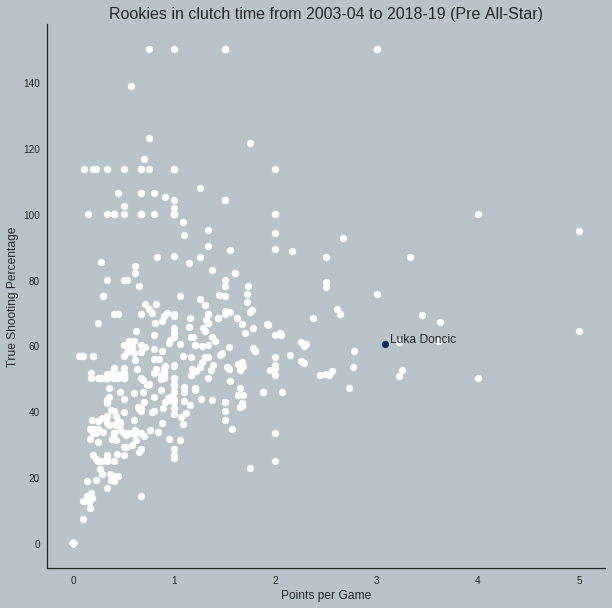

In [28]:
plot_scatter_clutch(
    data=data_frame,
    title='Rookies in clutch time from 2003-04 to 2018-19 (Pre All-Star)',
    per_game_and_filter=True,
    image_name='images/rookies_clutch_ppg.jpg'
)

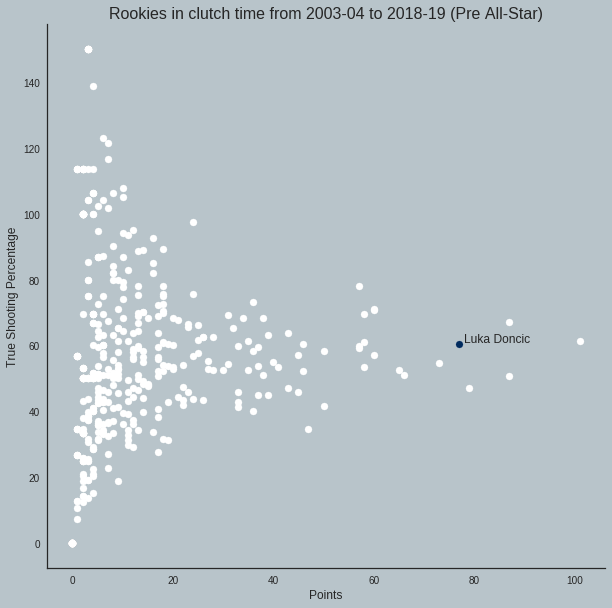

In [29]:
plot_scatter_clutch(
    data=data_frame,
    title='Rookies in clutch time from 2003-04 to 2018-19 (Pre All-Star)',
    per_game_and_filter=False,
    image_name='images/rookies_clutch_total.jpg'
)

## Luka Doncic's Shotchart(s)

### SETUP

In [30]:
from collections import Counter
import operator
def create_bins(data_frame, bin_number_x = 30, bin_number_y=300 / (500.0 / 30.0), league_average = None,
                width = 500, height = 300, norm_x = 250, norm_y = 48):
    """
    Method which creates bins the dataset into squared grid. This is used so that plot looks nicer than the raw
    locations plot. Along with binning the data, the percentages per zones and for each bin are calculated here
    and added to the copy of data_frame object so they can be used for plotting later.

    :return: Returns the copied  data_frame pandas DataFrame object with additional info about the shots.
    """
    # Binned x and y coordinates
    x_bins, y_bins = [], []
    # Copying the dataset to add more data
    copied_df = data_frame.copy()
    # Keys are basically x_bin and y_bin
    keys = []
    # Counter of shots and shots made per locations
    location_counts, location_made = Counter(), Counter()
    # be found

    # Size of elements in bin, they should be the same
    bin_size_x = float(width) / float(bin_number_x)
    bin_size_y = float(height) / float(bin_number_y)
    # List for locations of shots
    locations_annotated = []
    # Counter of shots and shots made per zone
    zones_counts, zones_made = Counter(), Counter()

    # Maximum size of an element in one bin
    max_size = int((int(bin_size_x) - 1) * (int(bin_size_y) - 1))

    # Keys that are in restricted area will be stored here, this will be used for finding maximum number of shots
    restricted_area_keys = []

    # Dictionary which will determine the color of marker in bin
    percentage_color_dict = {}

    for i in range(len(data_frame)):

        # Row from data frame
        row = data_frame.iloc[i]

        x_shot_orig, y_shot_orig = row.LOC_X, row.LOC_Y

        # Normalize
        x_shot = x_shot_orig + norm_x  # to put minimum to zero
        y_shot = y_shot_orig + norm_y  # to put minimum to zero

        # bin_index = (x_shot / w) * bin_size
        curr_x_bin = 0 if x_shot == 0 else int((x_shot / float(width)) * bin_number_x)
        curr_y_bin = 0 if y_shot == 0 else int((y_shot / float(height)) * bin_number_y)

        # Key for dicts
        key = (curr_x_bin, curr_y_bin)

        if row.SHOT_ZONE_BASIC == "Restricted Area":
            restricted_area_keys.append(key)

        # Counting number of shots made and shots shot
        keys.append(key)
        location_counts[key] += 1
        location_made[key] += row.SHOT_MADE_FLAG

        basic_shot_zone, shot_zone_area = row.SHOT_ZONE_BASIC, row.SHOT_ZONE_AREA
        zone_dist = row.SHOT_ZONE_RANGE

        area_code = shot_zone_area.split("(")[1].split(")")[0]
        if "3" in basic_shot_zone:
            locations_annotated.append("3" + area_code)
        elif "Paint" in basic_shot_zone:
            locations_annotated.append("P" + area_code + zone_dist[0])
        elif "Mid" in basic_shot_zone:
            locations_annotated.append("M" + area_code + zone_dist[0])
        else:
            locations_annotated.append("R" + area_code)

        # Creating key for zones
        zone_key = (basic_shot_zone, shot_zone_area, zone_dist)

        # Counting the occurences based on both bin_key and zone_key, because of that we have dict in dict
        if key in percentage_color_dict:
            if zone_key in percentage_color_dict[key]:
                percentage_color_dict[key][zone_key] = percentage_color_dict[key][zone_key] + 1
            else:
                percentage_color_dict[key][zone_key] = 1
        else:
            percentage_color_dict[key] = {}
            percentage_color_dict[key][zone_key] = 1

        zones_counts[zone_key] += 1

        if row.SHOT_MADE_FLAG:
            zones_made[zone_key] += 1

    shot_locations_percentage = []  # percentage in given bin
    shot_locations_counts = []
    raw_counts = []
    # List which contains comparison for each shot with league average in that zone
    shot_comparison = []
    # List which contains comparison of player's shooting in zone vs league average
    per_zone_comparison = []
    per_zone_percentage = []

    # Finding the maximal number of shots from data
    non_ra = []
    for key in location_counts:
        if key not in restricted_area_keys:
            if location_counts[key] not in non_ra:
                non_ra.append(location_counts[key])

    sorted_non_ra = sorted(non_ra)
    max_out_of_restricted = float(sorted_non_ra[-1])

    for j in range(len(data_frame)):
        key = keys[j]
        x_bin, y_bin = key[0], key[1]
        shot_percent = float(location_made[key]) / location_counts[key]
        # shot_percent = np.clip(shot_percent, 0.3, 0.7)
        shot_locations_percentage.append(shot_percent * 100)
        if league_average is not None:
            # Getting info about zone
            # We are getting that info from
            per_zone_counter_from_percentage_color_dict = percentage_color_dict[key]
            zone_key = max(per_zone_counter_from_percentage_color_dict.items(),
                           key=operator.itemgetter(1))[0]

            shot_zone_basic = zone_key[0]
            shot_zone_area = zone_key[1]
            distance = zone_key[2]

            # Calculating the percentage in current zone
            zone_percent = 0.0 if zone_key not in zones_made else float(zones_made[zone_key]) / \
                                                                  float(zones_counts[zone_key])

            # Retrieving league average percentage for current zone
            avg_percentage = league_average.loc[
                (league_average.SHOT_ZONE_BASIC == shot_zone_basic) &
                (league_average.SHOT_ZONE_AREA == shot_zone_area) &
                (league_average.SHOT_ZONE_RANGE == distance)].FG_PCT.iloc[
                0
            ]
            # Comparison of league average and each shot
            shot_comparison.append(np.clip((shot_percent - avg_percentage) * 100, -10, 10))
            # Comparison of zone and league average
            per_zone_comparison.append(np.clip((zone_percent - avg_percentage) * 100, -10, 10))
            # Percentage of shot in current zone, kinda inaccurate info, good for some other type of plot
            per_zone_percentage.append(np.clip(zone_percent * 100, 35, 65))

        # Calculating value to which the markers will be scaled later on
        # The data in restricted is scaled to maximum out of restricted area, because players usually have a lot
        # more shots in restricted area
        value_to_scale = max_out_of_restricted if location_counts[key] > max_out_of_restricted else \
            location_counts[key]
        # Storing the data into a list
        shot_locations_counts.append((float(value_to_scale) / max_out_of_restricted) * max_size)

        # Count of shots per bin
        raw_counts.append(location_counts[key])

        # Middle of current and next bin is where we will place the marker in real coordinates
        unbinned_x = ((x_bin * float(width)) / bin_number_x + (
                (x_bin + 1) * float(width)) / bin_number_x) / 2 - norm_x
        unbinned_y = ((y_bin * float(height)) / bin_number_y + (
                (y_bin + 1) * float(height)) / bin_number_y) / 2 - norm_y

        # Adding binned locations
        x_bins.append(unbinned_x)
        y_bins.append(unbinned_y)

    # Binned locations
    copied_df['BIN_LOC_X'] = x_bins
    copied_df['BIN_LOC_Y'] = y_bins
    # Percentage comparison with league averages
    if league_average is not None:
        # Comparison of each shot with league average for that zone
        copied_df['PCT_LEAGUE_AVG_COMPARISON'] = shot_comparison
        # Comparison of each zone with league average for that zone
        copied_df['PCT_LEAGUE_COMPARISON_ZONE'] = per_zone_comparison
    # Percentage of shots for that location
    copied_df['LOC_PERCENTAGE'] = shot_locations_percentage
    # Percentage of whole zone (not in comparison with league average)
    copied_df['LOC_ZONE_PERCENTAGE'] = per_zone_percentage
    # Scaled count of shots and count of shots per bin
    copied_df['LOC_COUNTS'] = shot_locations_counts
    copied_df['LOC_RAW_COUNTS'] = raw_counts

    return copied_df

### Plotting methods

In [31]:
from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -48), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [32]:
import matplotlib.path as mpath
def get_smooth_square():
    """
    Creates marker which represents smooth square.

    :return: new matplotlib.path.Path instance
    """
    marker = np.array([[-0.8, 1.0],
                       [-1.0, 0.8],
                       [-1.0, -0.8],
                       [-0.8, -1.0],
                       [0.8, -1.0],
                       [1.0, -0.8],
                       [1.0, 0.8],
                       [0.8, 1.0],
                       [-0.8, 1.0]])

    return mpath.Path(marker, closed=True)

def plot_shotchart(data_frame, title, image_name=None):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(12, 12))
    # colors_dict = {0:'red', 1:'green'}
    cmap = sns.blend_palette(colors=["#4159E1", "#B0E0E6", "#FFFF99","#EF3330", "#AB2020"], as_cmap=True)

    
    # LOC_PERCENTAGE -> total perc
    # PCT_LEAGUE_AVG_COMPARISON -> comparison per bins
    # PCT_LEAGUE_COMPARISON_ZONE -> comparison per zones only
    # LOC_X, LOC_Y -> real locs
    # BIN_LOC_X, BIN_LOC_Y -> binned locations
    marker = get_smooth_square()
    paths = ax.scatter(
        x=data_frame.BIN_LOC_X,
        y=data_frame.BIN_LOC_Y,
        marker=marker,
        s=data_frame.LOC_COUNTS * 2,
        c=data_frame.PCT_LEAGUE_COMPARISON_ZONE,
        cmap=cmap
    )

    """for i in range(len(cleared_df)):
        if cleared_df.iloc[i].LOCATION_CODE == "3C" or cleared_df.iloc[i].LOCATION_CODE == "RC":
            plt.text(x=cleared_df.iloc[i].LOC_X, y=cleared_df.iloc[i].LOC_Y, s=cleared_df.iloc[i].LOCATION_CODE, color="#E2E2FF")"""

    # Frequency

    ax.text(x=-240, y=395, s="Less\nFrequent", rotation=-5, color="#E8E8FF", fontsize=12)
    ax.scatter(x=-218, y=380, s=20 * 1 * 2.5, marker=marker, c="#E8E8FF")
    ax.scatter(x=-205, y=383, s=20 * 3 * 2.5, marker=marker, c="#E8E8FF")
    ax.scatter(x=-190, y=380, s=20 * 6 * 2.5, marker=marker, c="#E8E8FF")
    ax.scatter(x=-171, y=377, s=20 * 9 * 2.5, marker=marker, c="#E8E8FF")
    ax.scatter(x=-151, y=380, s=20 * 12 * 2.5, marker=marker, c="#E8E8FF")
    ax.text(x=-145, y=350, s="More\nFrequent", rotation=5, color="#E8E8FF", fontsize=12)


    # Efficiency

    ax.text(x=70, y=410, s="Comparison with league average percentage", color="#E8E8FF", fontsize=12)
    ax.text(x=95, y=360, s="Below\nAverage", rotation=10, color="#E8E8FF", fontsize=12)
    ax.scatter(x=130, y=377, s=550, marker=marker, c="#4159E1")
    ax.scatter(x=147, y=377, s=550, marker=marker, c="#B0E0E6")
    ax.scatter(x=164, y=377, s=550, marker=marker, c="#FFFF99")
    ax.scatter(x=181, y=377, s=550, marker=marker, c="#EF3330")
    ax.scatter(x=198, y=377, s=550, marker=marker, c="#AB2020")
    ax.text(x=195, y=390, s="Above\nAverage", rotation=-10, color="#E8E8FF", fontsize=12)

    # Changing court color
    ax.set_facecolor('#363F48')

    #plt.xticks(np.arange(-250, 251, 20))
    #plt.yticks(np.arange(-50, 490, 20))
    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)

    # Title
    plt.title(title, size=20)
    
    # Drawing court
    draw_court(ax=ax,outer_lines=True, lw=3)
    ax.set_xlim(-251,251)
    ax.set_ylim(-65,423)

    if image_name:
        fig.savefig(image_name, bbox_inches='tight')

In [33]:
def plot_raw_shotchart(data_frame, title, image_name=None):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(12, 12))
    
    green = '#45B056'
    red = '#B04556'
    
    made_shots = data_frame.loc[data_frame.SHOT_MADE_FLAG == 1]
    missed_shots = data_frame.loc[data_frame.SHOT_MADE_FLAG == 0]
    paths = ax.scatter(
        x=made_shots.LOC_X,
        y=made_shots.LOC_Y,
        marker='o',
        c=green,
        s=100
    )
    
    paths = ax.scatter(
        x=missed_shots.LOC_X,
        y=missed_shots.LOC_Y,
        marker='x',
        c=red,
        s=100
    )
        
    # Legend
    ax.scatter(x=185, y=380, s=400, marker='o', c=green)
    ax.text(x=200, y=378, s="Made", color=green, fontsize=18, ha='left', va='center')
    ax.scatter(x=185, y=365, s=400, marker='x', c=red)
    ax.text(x=200, y=363, s="Missed", color=red, fontsize=18, ha='left', va='center')
    
    # Changing court color
    ax.set_facecolor('#363F48')

    #plt.xticks(np.arange(-250, 251, 20))
    #plt.yticks(np.arange(-50, 490, 20))
    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)

    # Title
    plt.title(title, size=20)
    
    # Drawing court
    draw_court(ax=ax,outer_lines=True, lw=3)
    ax.set_xlim(-251,251)
    ax.set_ylim(-65,423)
    
    if image_name:
        fig.savefig(image_name, bbox_inches='tight')

### Drawing shotchart

In [34]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name

In [35]:
doncic_data = find_players_by_full_name("Luka Doncic")
doncic_shotchart = ShotChartDetail(team_id=0, player_id=doncic_data[0]['id'], context_measure_simple='FGA')

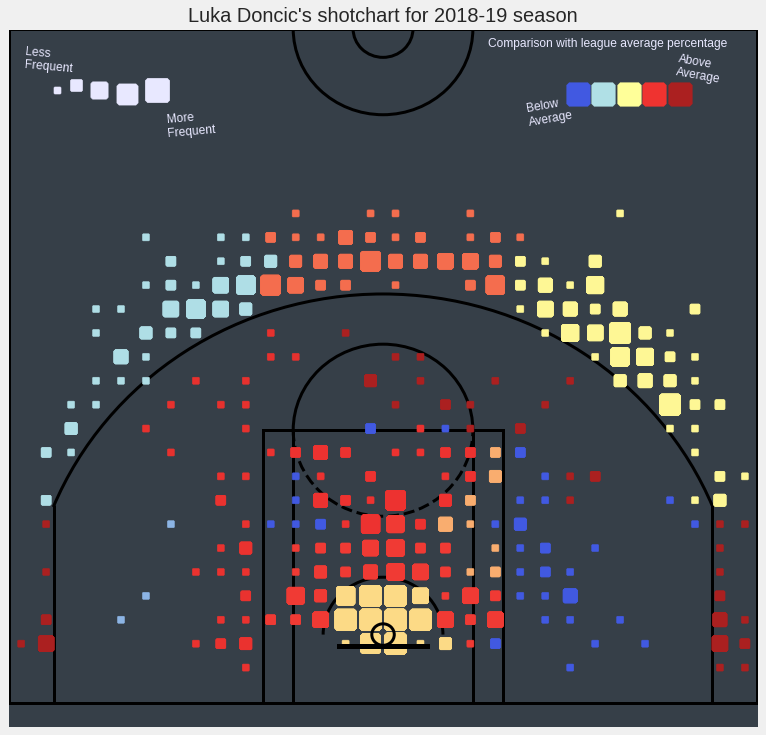

In [36]:
doncic_df = doncic_shotchart.get_data_frames()[0]
league_avg = doncic_shotchart.get_data_frames()[1]

doncic_df.LOC_X = -doncic_df.LOC_X  # REAL DATA IS FLIPPED
doncic_df = doncic_df.loc[(doncic_df.SHOT_ZONE_AREA != "Back Court(BC)")
                          & (doncic_df.LOC_Y < 300)]  # drop shots that aren't close to the center

binned_df = create_bins(data_frame=doncic_df, league_average=league_avg)

plot_shotchart(data_frame=binned_df, title="Luka Doncic's shotchart for 2018-19 season",
               image_name='images/doncic_shotchart.jpg')

### Visualizing Luka's favourite shot, step backs

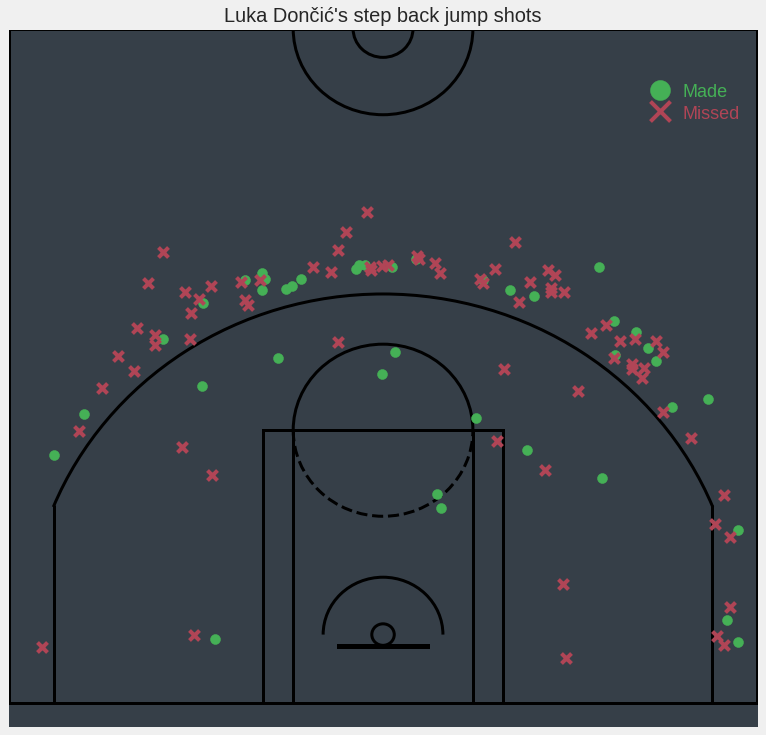

In [37]:
step_backs = doncic_df.loc[doncic_df.ACTION_TYPE == 'Step Back Jump shot']

plot_raw_shotchart(step_backs, 'Luka Dončić\'s step back jump shots', image_name='images/doncic_shotchart_step_back.jpg')

### Clutch Time Luka shotchart

In [38]:
clutch_shots_data = ShotChartDetail(
    team_id=0,
    player_id=doncic_data[0]['id'],
    context_measure_simple='FGA',
    clutch_time_nullable='Last 5 Minutes',
    ahead_behind_nullable='Ahead or Behind'
)


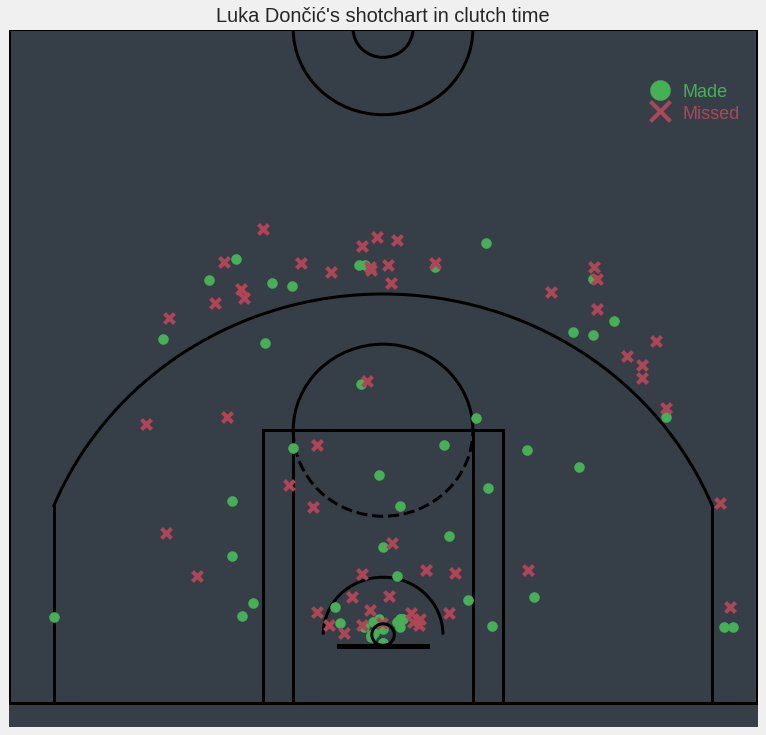

In [39]:
clutch_shot_df = clutch_shots_data.get_data_frames()[0]
clutch_shot_df.LOC_X = -clutch_shot_df.LOC_X
plot_raw_shotchart(clutch_shot_df, 'Luka Dončić\'s shotchart in clutch time', image_name='images/doncic_shotchart_clutch.jpg')

### Visualizing types of shots Doncic takes

In [40]:
from collections import OrderedDict
def prepare_data_from_shot_chart(full_data, made_shots_data):
    full_counts_dict = full_data.ACTION_TYPE.value_counts().to_dict()
    made_counts_dict = made_shots_data.ACTION_TYPE.value_counts().to_dict()
    modified_made_dict = OrderedDict()
    for key in full_counts_dict.keys():
        if key not in made_counts_dict:
            modified_made_dict[key] = 0
        else:
            modified_made_dict[key] = made_counts_dict[key]
    return full_counts_dict, modified_made_dict

In [41]:
from collections import Counter
def group_classes(data, is_play_type: bool):
    play_types = ['Cutting', 'Running', 'Driving', 'Step Back', 'Fadeaway', 'Turnaround', 'Pullup']

    # Note, 'Jump Shot' and 'Jump shot' will be the same thing
    shot_types = ['Jump Shot', 'Layup Shot', 'Dunk Shot', 'Hook Shot']
    
    filtered_counts = Counter()
    for key in data:
        action = key.lower()
        target_action_list = shot_types
        if is_play_type:
            target_action_list = play_types
            special_key = "Turnaround Fadeaway"
            if special_key.lower() in action:
                filtered_counts[special_key] += data[key]
        for play_type in target_action_list:
            if play_type.lower() in action:
                filtered_counts[play_type] += data[key]
    
    return filtered_counts

In [42]:
def plot_data_barchart_types_h(full_dict, made_shots_dict, title, rotate_text=False, img_name=None):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(14, 14))
    fig.set_facecolor(silver)
    ax.set_facecolor(silver)

    ax.barh(list(full_dict.keys()), list(full_dict.values()), color=navy_blue)
    ax.barh(list(made_shots_dict.keys()), list(made_shots_dict.values()), color=royal_blue)
    ax.grid(False)
    ax.set_yticklabels(
        list(full_dict.keys()),
        size=12,
    )
    ax.set_xticklabels([])

    for i, key in enumerate(full_dict.keys()):
        string = str(made_shots_dict[key]) + "/" + str(full_dict[key])
        ax.text(
            y=i,
            x=full_dict[key] + len(string),
            s=string,
            ha='center',
            size=18,
            color=black,
        )

    ax.set_title(title, size=24)
    
    if img_name:
        fig.savefig(img_name, facecolor=silver, bbox_inches='tight')

In [43]:
def plot_data_barchart_types(full_dict, made_shots_dict, title, rotate_text=False, img_name=None):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(14, 14))
    fig.set_facecolor(silver)
    ax.set_facecolor(silver)

    ax.bar(list(full_dict.keys()), list(full_dict.values()), color=navy_blue)
    ax.bar(list(made_shots_dict.keys()), list(made_shots_dict.values()), color=royal_blue)
    ax.grid(False)
    ax.set_xticklabels(
        list(full_dict.keys()),
        size=12,
        rotation = 45 if rotate_text else 0,
        ha="right" if rotate_text else "center"
    )
    ax.set_yticklabels([])

    for i, key in enumerate(full_dict.keys()):
        ax.text(
            x=i,
            y=full_dict[key] + 3,
            s=str(made_shots_dict[key]) + "/" + str(full_dict[key]),
            ha='center',
            size=18,
            color=black,
        )

    ax.set_title(title, size=24)
    if img_name:
        fig.savefig(img_name, facecolor=silver, bbox_inches='tight')

In [44]:
made_shots_df = doncic_df.loc[doncic_df.SHOT_MADE_FLAG == 1]
full_dict, made_dict = prepare_data_from_shot_chart(doncic_df, made_shots_df)

### FGM and FGA based on play type

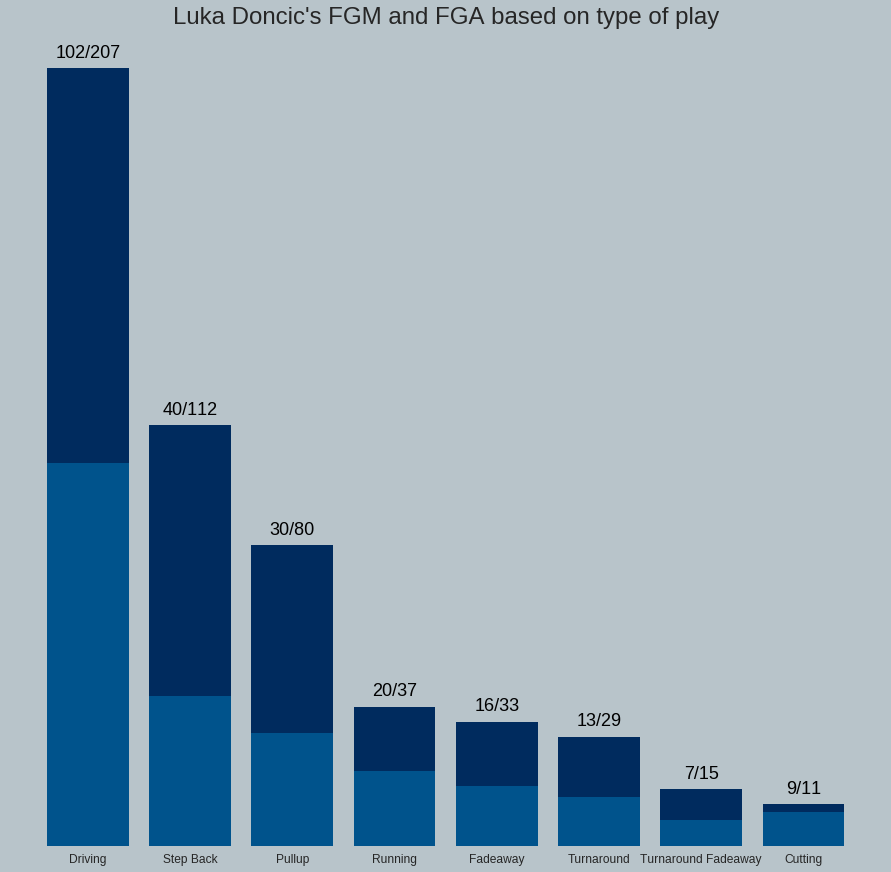

In [45]:
full_grouped_play = group_classes(full_dict, True)
made_grouped_play = group_classes(made_dict, True)
full_grouped_play = dict(sorted(full_grouped_play.items(), key=lambda kv: -kv[1]))
plot_data_barchart_types(full_grouped_play, made_grouped_play, "Luka Doncic's FGM and FGA based on type of play",
                        img_name='images/doncic_play_ranking.jpg')

### FGM and FGA based on shot type

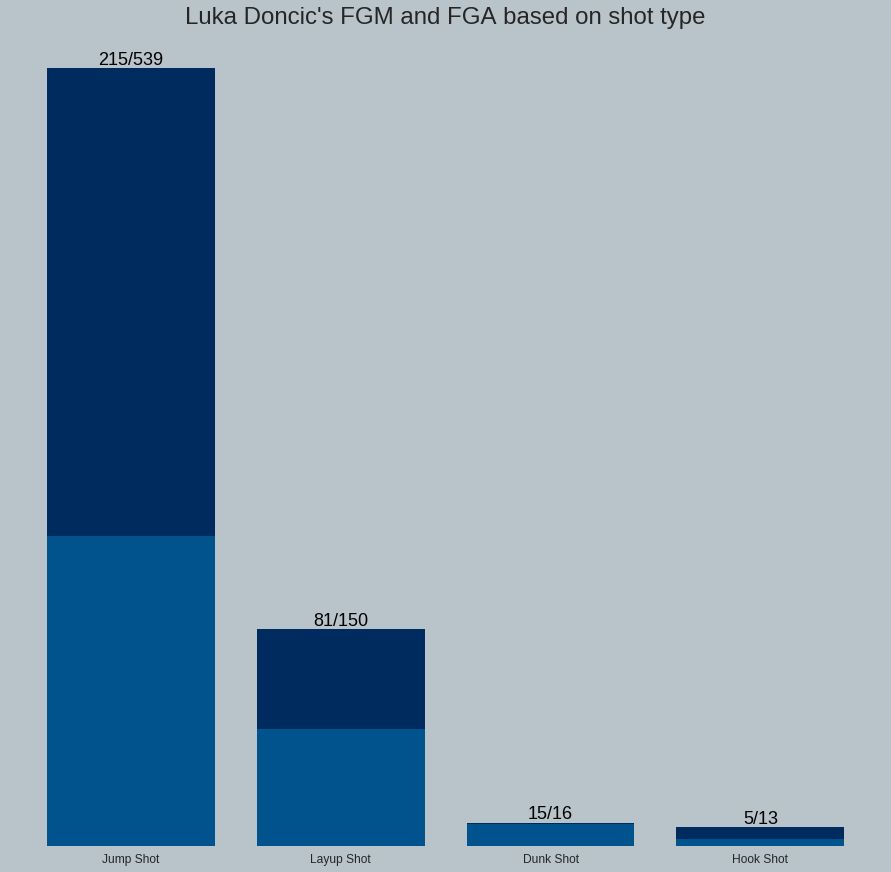

In [46]:
full_grouped_play = group_classes(full_dict, False)
made_grouped_play = group_classes(made_dict, False)
plot_data_barchart_types(full_grouped_play, made_grouped_play, "Luka Doncic's FGM and FGA based on shot type")

### Visualizing efficiency based on types of jump shot

In [47]:
jump_shots = doncic_df.loc[doncic_df.ACTION_TYPE.str.lower().str.contains('jump shot')]

In [48]:
made_jump_shots = jump_shots.loc[jump_shots.SHOT_MADE_FLAG == 1]

In [49]:
full_jump_shots_dict, made_jump_shots_dict = prepare_data_from_shot_chart(jump_shots, made_jump_shots)

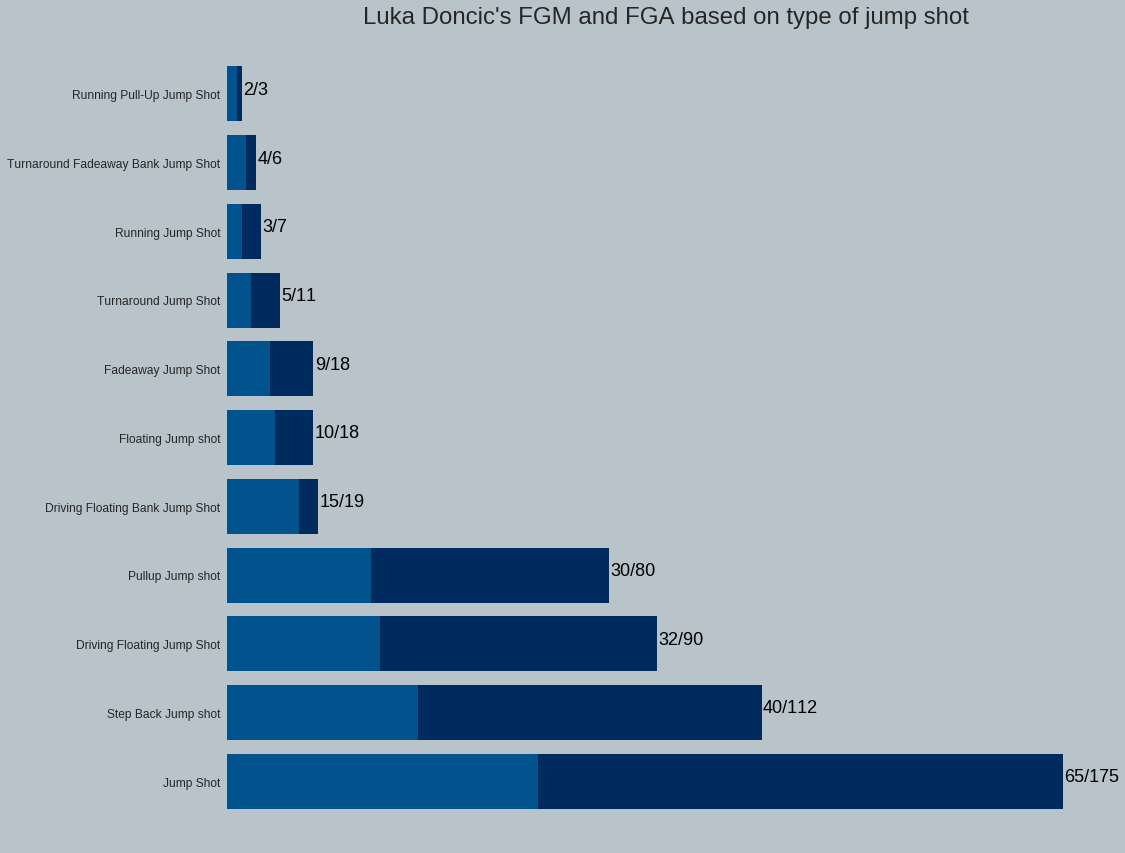

In [50]:
plot_data_barchart_types_h(
    full_jump_shots_dict,
    made_jump_shots_dict,
    "Luka Doncic's FGM and FGA based on type of jump shot",
    rotate_text=True,
    img_name='images/doncic_jump_shots_ranking.jpg'
)

## Analyzing Doncic's assist preferences

For this part of analysis I downloaded the data from basketball-reference. The data is stored as csv locally. I didn't want to write a scraper as of now.

In [51]:
doncic_assists = pd.read_csv('doncic_assists.csv')

However, the only thing that interests us is the part of the description which contains info about who did Doncic
assist.

In [52]:
doncic_assists.head(5)

,Rk,Date,Tm,Unnamed: 3,Opp,Qtr,Time,Score (Before),Description,Score (After)
0,1,2018-10-17,DAL,@,PHO,1st,11:16.0,DAL tied (0-0),D. Jordan makes 2-pt dunk at rim (assist by L....,DAL up 2 (2-0)
1,2,2018-10-17,DAL,@,PHO,1st,7:50.0,DAL down 7 (6-13),D. Jordan makes 2-pt layup from 1 ft (assist b...,DAL down 5 (8-13)
2,3,2018-10-17,DAL,@,PHO,1st,7:06.0,DAL down 3 (10-13),D. Jordan makes 2-pt dunk at rim (assist by L....,DAL down 1 (12-13)
3,4,2018-10-17,DAL,@,PHO,3rd,2:08.0,DAL down 12 (66-78),D. Finney-Smith makes 3-pt jump shot from 23 f...,DAL down 9 (69-78)
4,5,2018-10-20,DAL,NaN,MIN,1st,7:34.0,DAL down 10 (6-16),W. Matthews makes 3-pt jump shot from 23 ft (a...,DAL down 7 (9-16)


In [53]:
from collections import Counter
from collections import defaultdict
assist_counter = Counter()
distance_assist = defaultdict(list)
shot_type_assist = defaultdict(list)

for item in doncic_assists.Description:
    scorer = item.split(" ")[1]
    assist_counter[scorer]+=1
    cleaned_desc = item.split("(")[0].strip()
    if "at rim" in cleaned_desc:
        distance_assist[scorer].append(0)
    else:
        distance_assist[scorer].append(int(cleaned_desc.split(" ")[-2]))
    if '2-pt' in item:
        shot_type_assist[scorer].append('2pt')
    else:
        shot_type_assist[scorer].append('3pt')

In [54]:
assists_sorted_counter = dict(sorted(assist_counter.items(), key= lambda kv: -kv[1]))

/home/daniel/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


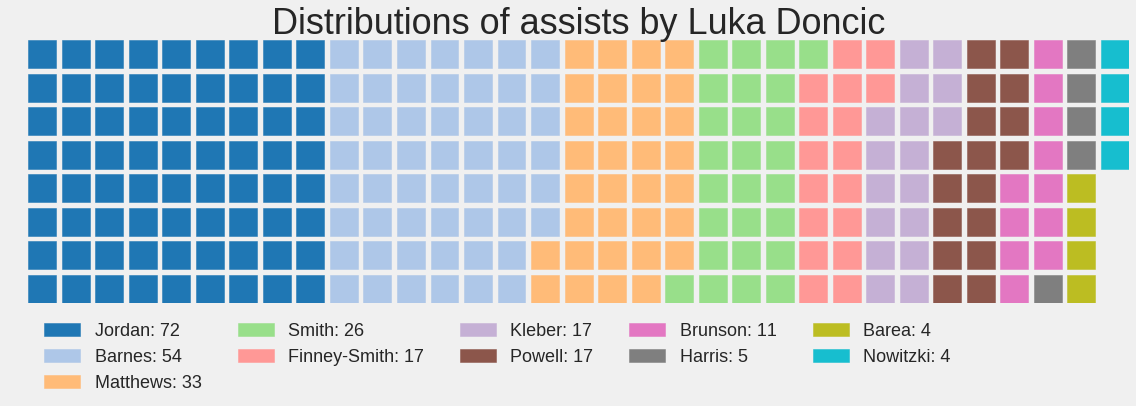

In [55]:
plt.style.use('fivethirtyeight')
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle, 
    rows=8,
    colors=[plt.cm.tab20(i/float(len(assists_sorted_counter))) for i in range(len(assists_sorted_counter))],
    values=assists_sorted_counter, 
    title={'label': 'Distributions of assists by Luka Doncic', 'size': 36},
    labels=[f"{key}: {value}" for key, value in assists_sorted_counter.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(assist_counter) // 2,
        'framealpha': 0,
        'fontsize': 18
    },
    plot_direction='NW',
    figsize=(16, 16)
)
fig.savefig('images/assists_distribution.jpg', bbox_inches='tight')

In [56]:
del distance_assist['Barea']
del distance_assist['Nowitzki']
del distance_assist['Harris']
distance_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in distance_assist.items()])).melt().dropna()

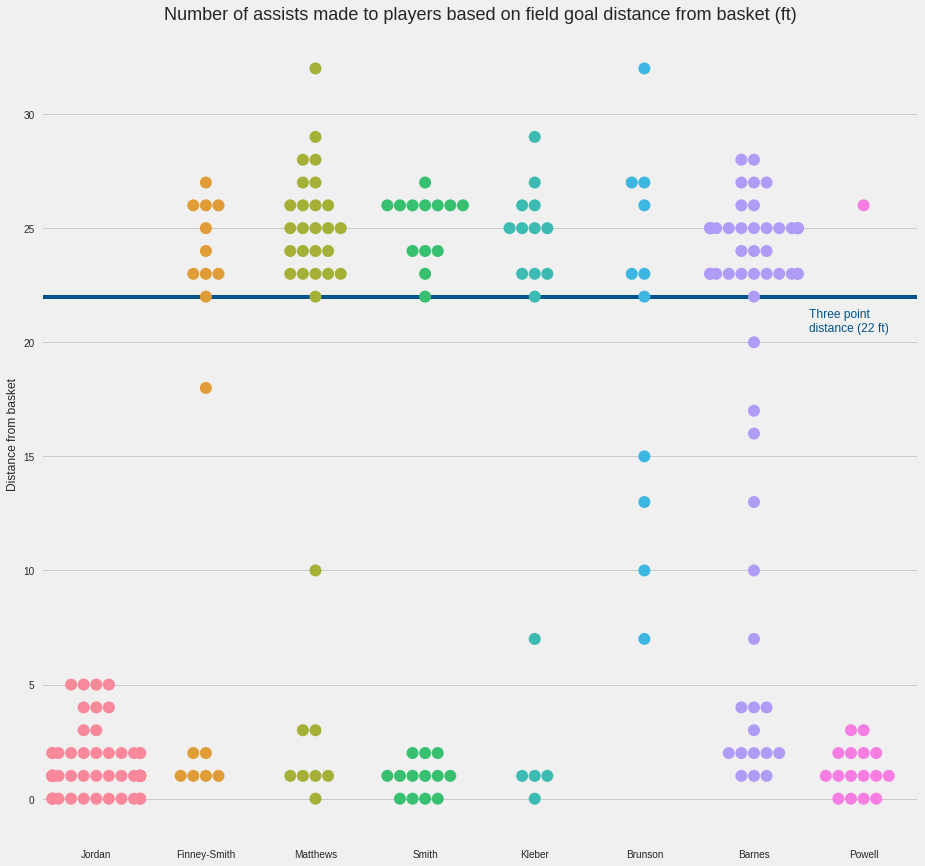

In [57]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14, 14))

# ax.set_facecolor(silver)
# fig.set_facecolor(silver)

sns.swarmplot(x='variable', y='value', data=distance_df, size=12, )
ax.axhline(y=22, color=royal_blue)
ax.text(x=len(distance_assist)-1.5, y=20.5, s="Three point\ndistance (22 ft)", size=12, ha='left', color=royal_blue)

ax.set_xlabel("")
ax.set_ylabel("Distance from basket", size=12)
_ = ax.set_title("Number of assists made to players based on field goal distance from basket (ft)", size=18)

fig.savefig('images/assists_distance.jpg', bbox_inches='tight')

## Advanced data comparison 

In [58]:
advanced_data = pd.read_csv('rookies_advanced_stats.csv')
regular_data = pd.read_csv('rookies_stats.csv')

In [59]:
advanced_data.head(5)

,Rk,Player,Season,Age,Tm,Lg,MP,G,BPM,GS,...,USG%,ORtg,DRtg,OWS,DWS,WS,WS/48,OBPM,DBPM,VORP
0,1,Chris Paul,2005-06,20,NOK,NBA,36.0,78,6.1,78,...,22.2,114,104,6.8,3.6,10.4,0.178,4.7,1.4,5.7
1,2,Nikola Jokic,2015-16,20,DEN,NBA,21.7,80,4.8,55,...,19.9,118,104,4.5,2.2,6.7,0.185,2.6,2.2,3.0
2,3,Ben Simmons,2017-18,21,PHI,NBA,33.7,81,4.6,81,...,22.3,111,102,4.2,5.0,9.2,0.162,1.0,3.6,4.6
3,4,Kawhi Leonard,2011-12,20,SAS,NBA,24.0,64,4.3,39,...,14.5,119,101,3.1,2.4,5.5,0.171,2.0,2.3,2.4
4,5,Luka Doncic,2018-19,19,DAL,NBA,32.1,47,3.5,47,...,28.5,108,109,1.8,1.8,3.6,0.113,2.7,0.8,2.1


In [60]:
regular_data.head(5)

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Chris Paul,2005-06,20,NOK,NBA,10.4,78,78,36.0,...,0.1,2.3,2.8,16.1,0.430,0.464,0.282,0.456,0.847,0.546
1,2,Blake Griffin,2010-11,21,LAC,NBA,9.8,82,82,38.0,...,0.5,2.7,3.1,22.5,0.506,0.510,0.292,0.508,0.642,0.549
2,3,Ben Simmons,2017-18,21,PHI,NBA,9.2,81,81,33.7,...,0.9,3.4,2.6,15.8,0.545,0.551,0.000,0.545,0.560,0.557
3,4,Karl-Anthony Towns,2015-16,20,MIN,NBA,8.3,82,82,32.0,...,1.7,2.2,3.0,18.3,0.542,0.559,0.341,0.555,0.811,0.590
4,5,Dwight Howard,2004-05,19,ORL,NBA,7.3,82,82,32.6,...,1.7,2.0,2.8,12.0,0.520,0.521,0.000,0.520,0.671,0.571


In [61]:
advanced_data.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'MP', 'G', 'BPM', 'GS',
       'MP.1', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'VORP'],
      dtype='object')

In [62]:
regular_data.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%'],
      dtype='object')

In [63]:
regular_data.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%'],
      dtype='object')

In [64]:
# Interesting advanced: PER, BPM, VORP, WS

# Interesting normal: PTS, TRB, AST, STL, BLK

In [65]:
top_20_per = advanced_data.sort_values(by='PER', ascending=False).head(20).sort_values(by='PER')

In [66]:
top_20_bpm = advanced_data.sort_values(by='BPM', ascending=False).head(20).sort_values(by='BPM')

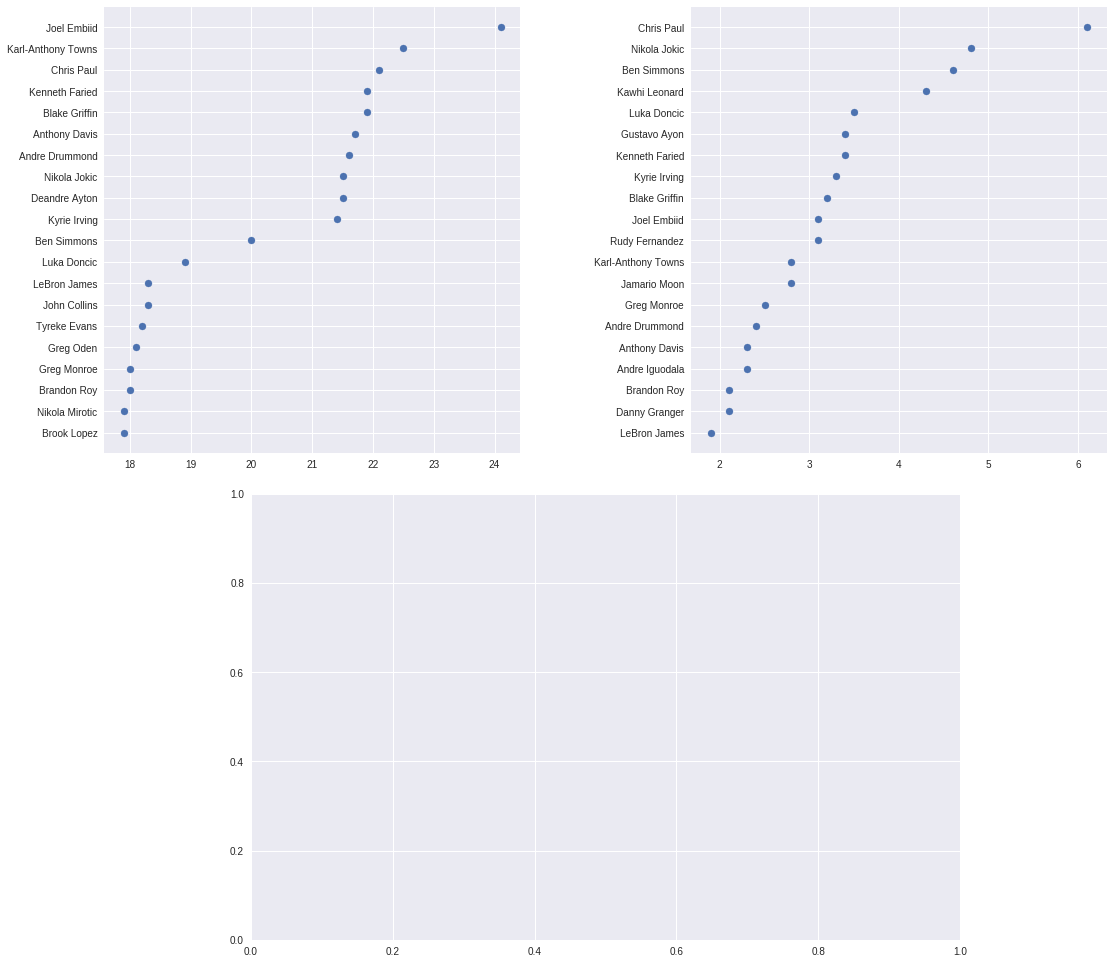

In [67]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 16))
gridsize = (4, 7)
ax1 = plt.subplot2grid(shape=gridsize, loc=(0, 0), rowspan=2, colspan=3, fig=fig)

ax1.scatter(x=top_20_per.PER, y=top_20_per.Player)

ax2 = plt.subplot2grid(shape=gridsize, loc=(0, 4), rowspan=2, colspan=3, fig=fig)

ax2.scatter(x=top_20_bpm.BPM, y=top_20_bpm.Player)

ax3 = plt.subplot2grid(shape=gridsize, loc=(2, 1), rowspan=2, colspan=5, fig=fig)

## Step back jump shot comparison

In [69]:
harden_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("James Harden")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]
time.sleep(1)

curry_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("Stephen Curry")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]
time.sleep(1)

dame_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("Damian Lillard")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]
time.sleep(1)

pg_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("Paul George")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]
time.sleep(1)

kyrie_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("Kyrie Irving")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]
time.sleep(1)

kemba_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("Kemba Walker")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]
time.sleep(1)

beal_df = ShotChartDetail(
    team_id=0,
    player_id=find_players_by_full_name("Bradley Beal")[0]['id'],
    context_measure_simple='FGA',
    season_nullable='2018-19'
).get_data_frames()[0]

In [70]:
data_frames = [
    doncic_df,
    harden_df,
    curry_df,
    pg_df,
    dame_df,
    kemba_df,
    beal_df,
    kyrie_df
]

In [71]:
def filter_step_backs(df):
    jump_shots = df.loc[df.ACTION_TYPE == 'Step Back Jump shot']
    made_jump_shots = jump_shots.loc[jump_shots.SHOT_MADE_FLAG == 1]
    
    return len(made_jump_shots), len(jump_shots)

In [72]:
player_names = list()
made_step_backs = list()
step_backs = list()

for df in data_frames:
    player_names.append(df.iloc[0].PLAYER_NAME)
    made, attempted = filter_step_backs(df)
    made_step_backs.append(made)
    step_backs.append(attempted)

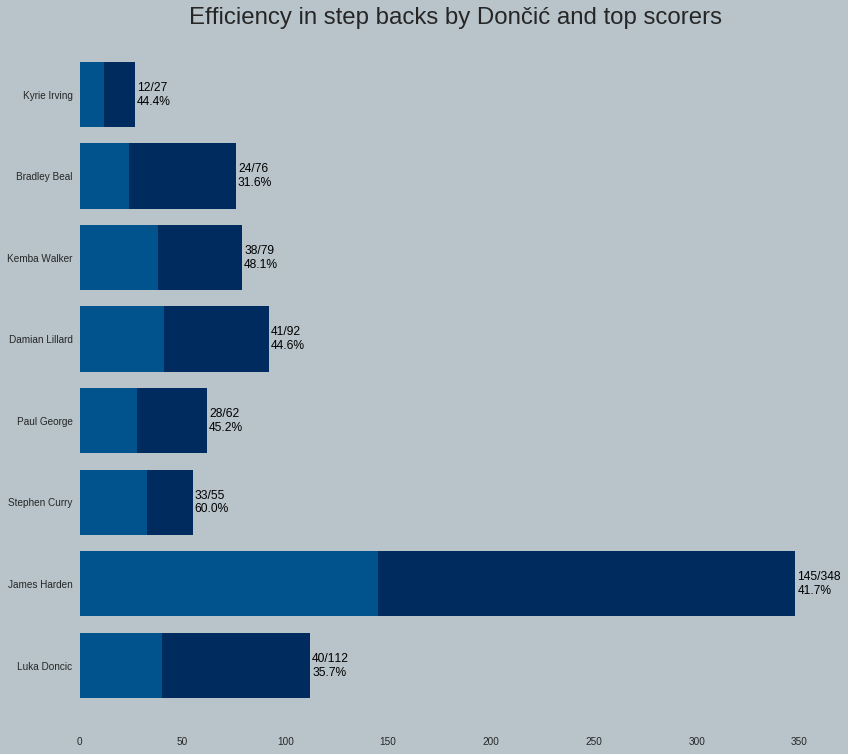

In [73]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 12))

ax.barh(y=player_names, width=step_backs, color=navy_blue)
ax.barh(y=player_names, width=made_step_backs, color=royal_blue)

for i in range(len(player_names)):
    percentage = made_step_backs[i] / step_backs[i] * 100
    text = str(made_step_backs[i]) + "/" + str(step_backs[i]) + "\n" + "{0:.1f}".format(percentage) + "%"
    plt.text(x=step_backs[i] + 1, y=i, s=text, color=black, fontsize=12, va="center")

ax.grid(False)
ax.set_facecolor(silver)
fig.set_facecolor(silver)

_ = ax.set_title('Efficiency in step backs by Dončić and top scorers', fontsize=24)

fig.savefig('images/step_backs_all.jpg', facecolor=silver, bbox_inches='tight')